# Program 552 Homework 2 2023  
## Statistical Differences between two time series
>Dennis L. Hartmann Jan 1, 2023  Homework_2_DLH.ipynb

In [50]:
# open necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd
from scipy import stats
import distfit as distfit

import matplotlib as mpl
# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

In [51]:
# Import text file containing test data
x = np.loadtxt('Data_HW_2.txt')
N = np.shape(x)   # what is the shape of the imported data set (500,2)
N0=N[0]
print(N)
#t = np.arrange(1,N,1)
t = np.linspace(1,N0,N0)   # Make a linear series to be like the time




(500, 2)


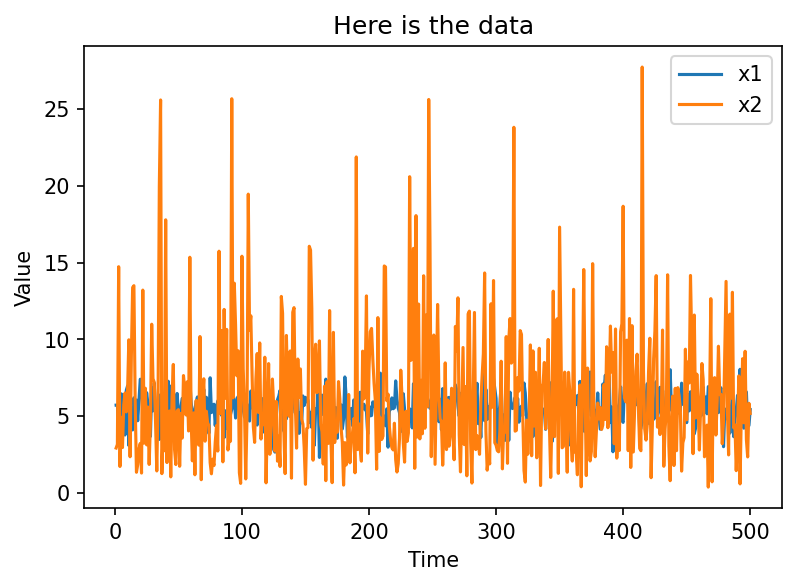

In [108]:
# plot the data
plt.figure()
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Here is the data')
plt.legend(['x1','x2'])



In [85]:
# OK, let's perform the t-test and the test and compare
x1=x[:,0]
x2=x[:,1]
tstatistic = stats.ttest_ind(x1,x2,equal_var=False)  # equal_var=False triggers Welches t-test
print(tstatistic)
rstatistic = stats.ranksums(x1,x2)
print(rstatistic)

Ttest_indResult(statistic=-3.905437668409452, pvalue=0.00010571631333586603)
RanksumsResult(statistic=1.2695340024657014, pvalue=0.20425067117143636)


What I am seeing here is that the t-test thinks the two means are different p~0.001, but the rank sum test is not so sure p~0.2.

In [110]:
# OK, let's make a table of statistics including 
# mean, median, mode, standard deviation, skewness, kurtosis, coeff of kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import mode
from tabulate import tabulate
mode1, count = mode(x1)
mode2, count = mode(x2)
mode1 = mode1[0]
mode2 = mode2[0]
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)
skew1 = skew(x1)
skew2 = skew(x2)
kurt1 = kurtosis(x1)  # if you don't want kurtosis excess, specify fisher=False
kurt2 = kurtosis(x2)
data = [['x1', mean1, mode1, std1, skew1, kurt1],['x2', mean2, mode2, std2, skew2, kurt2]]
df = pd.DataFrame(data)
print(tabulate(df, showindex=False, headers=['Dataset','Mean','Mode','STD','Skewness','Kurtosis'], floatfmt=".2f"))


Dataset      Mean    Mode    STD    Skewness    Kurtosis
---------  ------  ------  -----  ----------  ----------
x1           5.46    4.50   1.02       -0.16        0.09
x2           6.25    3.72   4.43        1.51        3.22


From the above table, I conclude that x1 is approximately Gaussian normal with small skewness and kurtosis excess, but that x2 is not Gaussian with positive skewness and very large kurtosis excess.

(array([ 1.,  2.,  1.,  7.,  1.,  6.,  9., 14., 11., 16., 23., 22., 27.,
        39., 51., 56., 36., 28., 34., 33., 22., 16., 15., 12.,  7.,  4.,
         3.,  3.,  0.,  1.]),
 array([2.2979    , 2.50385667, 2.70981333, 2.91577   , 3.12172667,
        3.32768333, 3.53364   , 3.73959667, 3.94555333, 4.15151   ,
        4.35746667, 4.56342333, 4.76938   , 4.97533667, 5.18129333,
        5.38725   , 5.59320667, 5.79916333, 6.00512   , 6.21107667,
        6.41703333, 6.62299   , 6.82894667, 7.03490333, 7.24086   ,
        7.44681667, 7.65277333, 7.85873   , 8.06468667, 8.27064333,
        8.4766    ]),
 <a list of 30 Patch objects>)

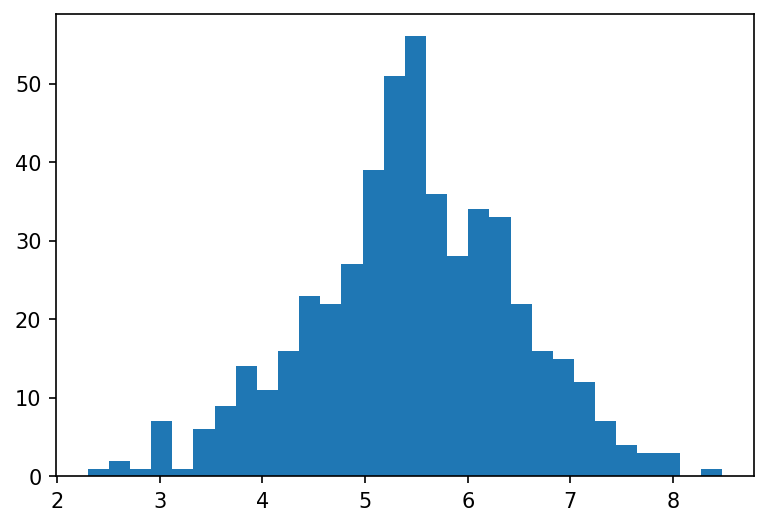

In [114]:
# OK, not lets try fitting some distributions to the dataprint(np.shape(x1))
nbins = 30  # specify the number of histogram bins
counts, bins = np.histogram(x1,nbins)
counts1, bins1 = np.histogram(x2,nbins)
#print(np.shape(counts),np.shape(bins))
#print(bins,counts)
#dist = distfit()        # Initialize 
#dist.fit_transform(X)   # Fit distributions on empirical data X
#dist.predict(y)         # Predict the probability of the resonse variables
#dist.plot()             # Plot the best fitted distribution (y is included if prediction is made)

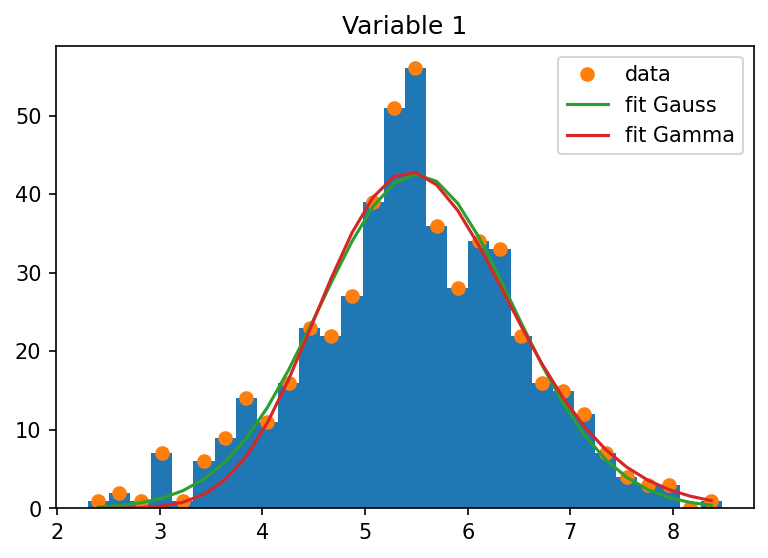

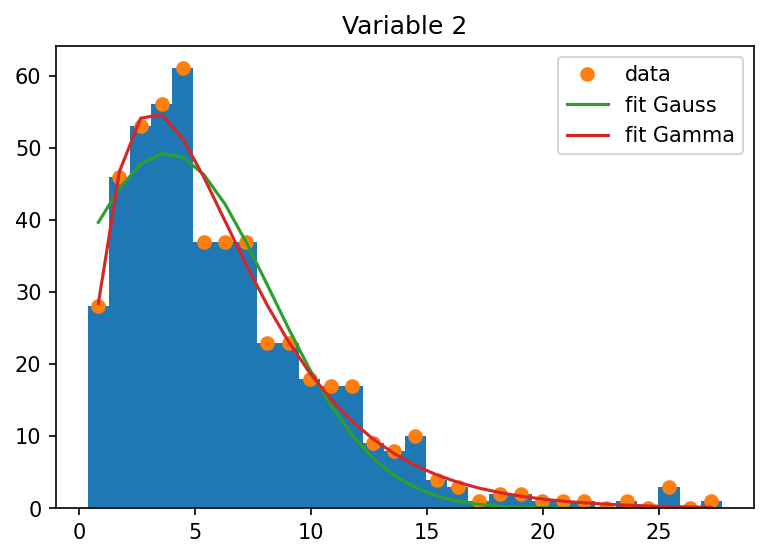

In [124]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
#ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
bins2=(bins[0:-1] + bins[1:])/2.
#print(np.shape(bins2))
#print(bins2)
xdata = np.asarray(bins2)
ydata = np.asarray(counts)
plt.figure()
#plt.plot(xdata, ydata, 'o')
plt.hist(x1,nbins)   # first plot the raw histogram as a bar plot
plt.plot(xdata, ydata, 'o', label='data')  # then put in circles for the same data
  
# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-C)**2)
    return y
def Gamma(x, A, B, C):
    y=C*x**(A-1)*np.exp(-x/B)
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)
parameters1, covariance1 = curve_fit(Gamma, xdata, ydata) 
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_A1 = parameters1[0]
fit_B1 = parameters1[1]
fit_C1 = parameters1[2]
  
fit_y = Gauss(xdata, fit_A, fit_B, fit_C)
fit_y1 = Gamma(xdata, fit_A1, fit_B1, fit_C1)


#plt.hist(x2,nbins)
plt.plot(xdata, fit_y, '-', label='fit Gauss')    # add the fitted data as line plots  this is the theory
plt.plot(xdata, fit_y1, '-', label='fit Gamma')
plt.legend()
plt.title('Variable 1')
plt.savefig('fig_x1.pdf')
plt.savefig('fig_x1.png')

# OK start over with histogram plot of data set x2
# Recast xdata and ydata into numpy arrays so we can use their handy features
# here we do it all again for the second time series
bins2=(bins1[0:-1] + bins1[1:])/2.
#print(np.shape(bins2))
#print(bins2)
xdata = np.asarray(bins2)
ydata = np.asarray(counts1)
plt.figure()
plt.hist(x2,nbins)  # first plot the raw histogram as a bar plot
  
# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-C)**2)
    return y
def Gamma(x, A, B, C):
    y=C*x**(A-1)*np.exp(-x/B)
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)
parameters1, covariance1 = curve_fit(Gamma, xdata, ydata) 
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_A1 = parameters1[0]
fit_B1 = parameters1[1]
fit_C1 = parameters1[2]
  
fit_y = Gauss(xdata, fit_A, fit_B, fit_C)
fit_y1 = Gamma(xdata, fit_A1, fit_B1, fit_C1)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit Gauss')
plt.plot(xdata, fit_y1, '-', label='fit Gamma')
plt.legend()
plt.title('Variable 2')
plt.savefig('fig_x2.pdf')
plt.savefig('fig_x2.png')